## Wordle Tweet Dataset EDA 
#### This notebook was created with help of https://www.youtube.com/watch?v=7SRcYdd9JcY&list=PL7RwtdVQXQ8qxBH6ugYn50D0M5u--2Xx4&index=8
- I edited the plots to show more information and to be nicer to look at 

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re                                    # Will be helpful for running regex on the text data we will be pulling

# Setting a number of columns to display
pd.set_option('display.max_columns', None)   # Set to None to display all columns
pd.set_option('display.width', 1000)         # Set width to a high value to display columns next to each other

In [2]:
# Import styles for the plots
from itertools import cycle

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

%matplotlib widget

### Load in the dataset

In [3]:
tweets = pd.read_csv('tweets.csv')
tweets.shape

(234186, 5)

In [4]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩


In [5]:
print(tweets['tweet_text'][2])

Wordle 210 4/6

⬜⬜⬜🟨⬜
⬜🟩⬜🟨⬜
⬜🟩⬜🟨⬜
🟩🟩🟩🟩🟩


In [6]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩


In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234186 entries, 0 to 234185
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   wordle_id       234186 non-null  int64 
 1   tweet_id        234186 non-null  int64 
 2   tweet_date      234186 non-null  object
 3   tweet_username  234186 non-null  object
 4   tweet_text      234186 non-null  object
dtypes: int64(2), object(3)
memory usage: 8.9+ MB


In [8]:
# Cleaning the data

tweets['tweet_date'] = pd.to_datetime(tweets['tweet_date'])
# import datetime as dt
# tweets['tweet_date'] = tweets['tweet_date'].dt.strftime("%Y-%m-%d")
# tweets['tweet_date'] = pd.to_datetime(tweets['tweet_date'])
tweets['wordle_id'] = tweets['tweet_text'].str[:10]                 # some wordles are noted as x so we extract the whole string, can be (x/6)
tweets['n_attempts'] = tweets['tweet_text'].str[11].astype('int')   # number of attempts it took to guess the wordle, e.g. 4 out of 6 available (4/6)
tweets['id'] = tweets['tweet_text'].str[7:10].astype('int')


In [9]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,n_attempts,id
0,Wordle 210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,4,210
1,Wordle 210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,4,210
2,Wordle 210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,4,210
3,Wordle 210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,3,210
4,Wordle 210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,3,210


In [10]:
tweets.columns

Index(['wordle_id', 'tweet_id', 'tweet_date', 'tweet_username', 'tweet_text', 'n_attempts', 'id'], dtype='object')

In [11]:
tweets = tweets[['wordle_id', 'tweet_id', 'tweet_date', 'tweet_username','n_attempts', 'id','tweet_text']]

In [12]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,n_attempts,id,tweet_text
0,Wordle 210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,4,210,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,Wordle 210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,4,210,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,Wordle 210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,4,210,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,Wordle 210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,3,210,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,Wordle 210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,3,210,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩


### How many tweets there are for each date?

#### Plot option 1

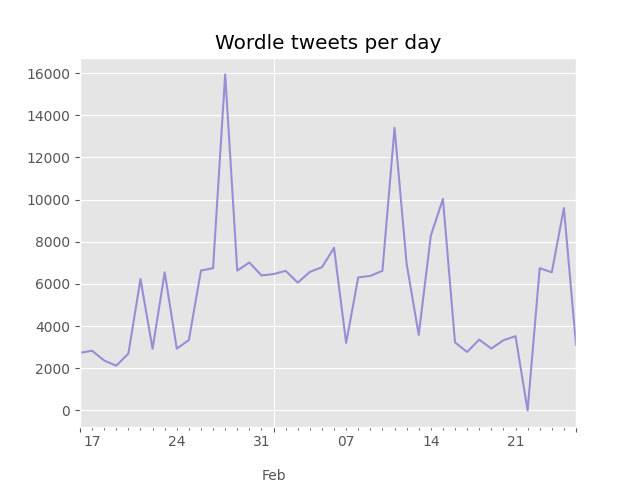

In [13]:
# Resample rides to daily, take the size, plot the results
tweets.resample('D', on = 'tweet_date')\
  .size()\
  .plot(title = "Wordle tweets per day", color=color_pal[2])

# Show the results
plt.show()

#### Plot option 2

In [14]:
# Another way of plotting
# tweets['tweet_date'].value_counts() \
#     .plot(figsize=(10, 5), title='Wordle Tweets by Day',
#           color=color_pal[2], lw=5)
# plt.show()

### Number of Attempts analysis by Wordle ID

In [15]:
# from IPython.display import display
# n_attempts_by_id = tweets.groupby('wordle_id')['n_attempts'].value_counts().unstack().style.background_gradient(axis=1)
# display(n_attempts_by_id)
tweets.groupby('wordle_id')['n_attempts'].value_counts() \
    .unstack() \
    .style.background_gradient(axis=1)

n_attempts,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


### How many attempts does it ususally take to solve?

In [16]:
counts = tweets.groupby('n_attempts', as_index=False)['wordle_id'].count()
counts

,n_attempts,wordle_id
0,2,14393
1,3,55047
2,4,78007
3,5,58090
4,6,28649


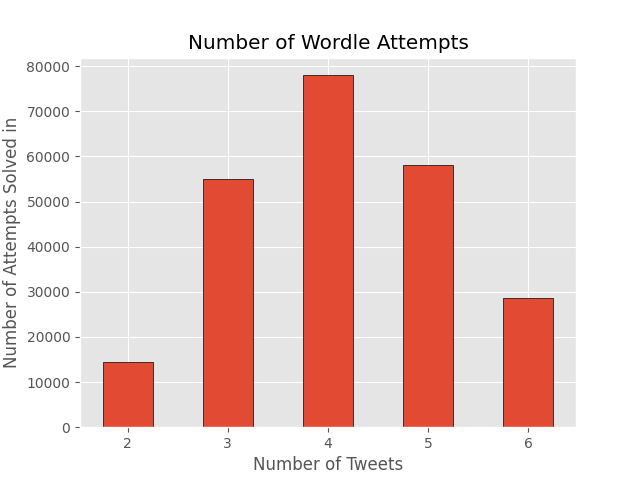

In [17]:
fig, ax = plt.subplots() 

ax.hist(tweets['n_attempts'], 
        bins = [1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25, 5.75, 6.25],
        edgecolor = 'black')

ax.set_xlabel('Number of Tweets')
ax.set_ylabel('Number of Attempts Solved in')
ax.set_title('Number of Wordle Attempts')
plt.show()

#### The same plot but with annotations

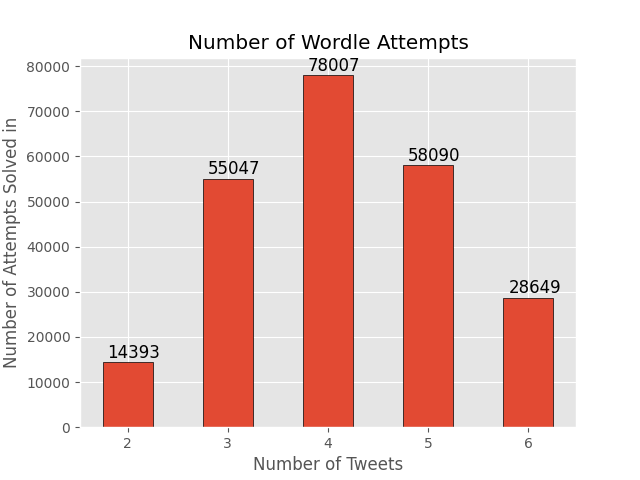

In [18]:
fig, ax = plt.subplots()

counts, bins, patches = ax.hist(tweets['n_attempts'], 
                                bins = [1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25, 5.75, 6.25],
                                edgecolor = 'black')

ax.set_xlabel('Number of Tweets')
ax.set_ylabel('Number of Attempts Solved in')
ax.set_title('Number of Wordle Attempts')

# Iterate over each bin and patch to add text annotations with y values
for count, x, patch in zip(counts, bins[:-1], patches):
    if count > 0:
        ax.annotate(str(int(count)), xy=(x + 0.05, count + 1000), fontsize=12)

plt.show()

### Parsing the data out

Here we treat each 'guess' as one row of rectangles. Rows are separated by '\n'. So in reality each 'guess' is the guessing-round where we have 5 guesses. We will have to clean up the data and parse each guess to another column.

We know that there are only 3 colors of the squares in wordle:

- green: correct letter and position,
- yellow: correct letter incorrect position, 
- black: both incorrect. 

However, some browsers use white squares instead of black. We will have to replace them. Let's see what color is more prevalent...

In [19]:
tweets['tweet_text'].str.contains('⬜').value_counts()

False    153619
True      80567
Name: tweet_text, dtype: int64

In [20]:
# there are far less white squares so we will replace them with black ones

tweets['tweet_text'] = tweets['tweet_text'].str.replace('⬜', '⬛')
tweets['tweet_text'].str.contains('⬜').any()

False

In [21]:
n = 1 # guess number

# 1. Split the string by new space character.
# 2. If string contains any of the squares, return true.
# 3. If there NaNs, fill them with false.
# 4. Count trues and falses.

tweets['tweet_text'].str.split('\n').str[n+1] \
    .str.contains('|'.join(['🟨','🟩','⬛'])) \
    .fillna(False) \
    .value_counts()

True    234186
Name: tweet_text, dtype: int64

In [22]:
# By adding the f and {n} to the aove code, we can create n-columns
tweets[f'has_guess{n}'] = tweets['tweet_text'].str.split('\n').str[n+1] \
    .str.contains('|'.join(['🟨','🟩','⬛'])) \
    .fillna(False)
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,n_attempts,id,tweet_text,has_guess1
0,Wordle 210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,4,210,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,True
1,Wordle 210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,4,210,Wordle 210 4/6\n\n⬛⬛⬛⬛⬛\n🟩🟩🟨🟨⬛\n🟩🟩⬛🟩🟨\n🟩🟩🟩🟩🟩,True
2,Wordle 210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,4,210,Wordle 210 4/6\n\n⬛⬛⬛🟨⬛\n⬛🟩⬛🟨⬛\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩,True
3,Wordle 210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,3,210,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟨🟨⬛⬛⬛\n🟩🟩🟩🟩🟩,True
4,Wordle 210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,3,210,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,True


In [23]:
# Parse out the tweet text for the guess
# We here create a guess{n} columns using has_guess{n} applied to tweets. Then we split and extract first 6 characters
tweets.loc[tweets[f'has_guess{n}'], f'guess{n}'] = \
    tweets['tweet_text'].str.split('\n').str[n+1].str[:5]

In [24]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,n_attempts,id,tweet_text,has_guess1,guess1
0,Wordle 210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,4,210,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,True,⬛⬛🟨🟨⬛
1,Wordle 210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,4,210,Wordle 210 4/6\n\n⬛⬛⬛⬛⬛\n🟩🟩🟨🟨⬛\n🟩🟩⬛🟩🟨\n🟩🟩🟩🟩🟩,True,⬛⬛⬛⬛⬛
2,Wordle 210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,4,210,Wordle 210 4/6\n\n⬛⬛⬛🟨⬛\n⬛🟩⬛🟨⬛\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩,True,⬛⬛⬛🟨⬛
3,Wordle 210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,3,210,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟨🟨⬛⬛⬛\n🟩🟩🟩🟩🟩,True,⬛⬛🟨⬛⬛
4,Wordle 210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,3,210,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,True,⬛⬛🟨⬛⬛


In [25]:
# Count number of correct, misplaced, and incorrect squares

# Count number correct, misplaced, and incorrect
tweets.loc[tweets[f'has_guess{n}'],
        f'guess{n}_incorrect'] = tweets[f'guess{n}'].str.count('⬛')

tweets.loc[tweets[f'has_guess{n}'],
        f'guess{n}_wrong_spot'] = tweets[f'guess{n}'].str.count('🟨')

tweets.loc[tweets[f'has_guess{n}'],
        f'guess{n}_correct'] = tweets[f'guess{n}'].str.count('🟩')

tweets.loc[tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n

In [26]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,n_attempts,id,tweet_text,has_guess1,guess1,guess1_incorrect,guess1_wrong_spot,guess1_correct,final_guess
0,Wordle 210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,4,210,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,True,⬛⬛🟨🟨⬛,3,2,0,NaN
1,Wordle 210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,4,210,Wordle 210 4/6\n\n⬛⬛⬛⬛⬛\n🟩🟩🟨🟨⬛\n🟩🟩⬛🟩🟨\n🟩🟩🟩🟩🟩,True,⬛⬛⬛⬛⬛,5,0,0,NaN
2,Wordle 210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,4,210,Wordle 210 4/6\n\n⬛⬛⬛🟨⬛\n⬛🟩⬛🟨⬛\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩,True,⬛⬛⬛🟨⬛,4,1,0,NaN
3,Wordle 210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,3,210,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟨🟨⬛⬛⬛\n🟩🟩🟩🟩🟩,True,⬛⬛🟨⬛⬛,4,1,0,NaN
4,Wordle 210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,3,210,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,True,⬛⬛🟨⬛⬛,4,1,0,NaN


In [27]:
# Now we can run value_counts on guess1_incorrect column to see what is the most common number of incorrect guesses in first guessing-round
tweets['guess1_incorrect'].value_counts()

4    86571
3    81470
5    32435
2    29877
1     3680
0      153
Name: guess1_incorrect, dtype: int64

- we can see that usually there are 4 incorrect guesses in the first guessing-round (first row contains 4 black squares)

## Let's turn the parsing part into a function

In [28]:
def parse_tweets(tweets):
    for n in range(6): 
        n += 1 # to start from 1 (range will start looping at 0)
        
        # Creating 'has_guess' column for each guessing-round that we will further use as a mask to be applied.
        tweets[f'has_guess{n}'] = tweets['tweet_text'].str.split('\n').str[n+1] \
            .str.contains('|'.join(['🟨','🟩','⬛'])) \
            .fillna(False)
        
        # Parse out the tweet text
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}'] = \
            tweets['tweet_text'].str.split('\n').str[n+1].str[:5]

        # Count number correct, misplaced, and incorrect
        tweets.loc[tweets[f'has_guess{n}'],
                f'guess{n}_incorrect'] = tweets[f'guess{n}'].str.count('⬛')

        tweets.loc[tweets[f'has_guess{n}'],
                f'guess{n}_wrong_spot'] = tweets[f'guess{n}'].str.count('🟨')

        tweets.loc[tweets[f'has_guess{n}'],
                f'guess{n}_correct'] = tweets[f'guess{n}'].str.count('🟩')

        tweets.loc[tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n
    return tweets
tweets = parse_tweets(tweets)

In [29]:
tweets

,wordle_id,tweet_id,tweet_date,tweet_username,n_attempts,id,tweet_text,has_guess1,guess1,guess1_incorrect,guess1_wrong_spot,guess1_correct,final_guess,has_guess2,guess2,guess2_incorrect,guess2_wrong_spot,guess2_correct,has_guess3,guess3,guess3_incorrect,guess3_wrong_spot,guess3_correct,has_guess4,guess4,guess4_incorrect,guess4_wrong_spot,guess4_correct,has_guess5,guess5,guess5_incorrect,guess5_wrong_spot,guess5_correct,has_guess6,guess6,guess6_incorrect,guess6_wrong_spot,guess6_correct
0,Wordle 210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,4,210,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,True,⬛⬛🟨🟨⬛,3,2,0,NaN,True,🟩⬛⬛⬛⬛,4.0,0.0,1.0,True,🟩🟩🟨⬛⬛,2.0,1.0,2.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
1,Wordle 210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,4,210,Wordle 210 4/6\n\n⬛⬛⬛⬛⬛\n🟩🟩🟨🟨⬛\n🟩🟩⬛🟩🟨\n🟩🟩🟩🟩🟩,True,⬛⬛⬛⬛⬛,5,0,0,NaN,True,🟩🟩🟨🟨⬛,1.0,2.0,2.0,True,🟩🟩⬛🟩🟨,1.0,1.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
2,Wordle 210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,4,210,Wordle 210 4/6\n\n⬛⬛⬛🟨⬛\n⬛🟩⬛🟨⬛\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩,True,⬛⬛⬛🟨⬛,4,1,0,NaN,True,⬛🟩⬛🟨⬛,3.0,1.0,1.0,True,⬛🟩⬛🟨⬛,3.0,1.0,1.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
3,Wordle 210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,3,210,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟨🟨⬛⬛⬛\n🟩🟩🟩🟩🟩,True,⬛⬛🟨⬛⬛,4,1,0,NaN,True,🟨🟨⬛⬛⬛,3.0,2.0,0.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
4,Wordle 210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,3,210,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,True,⬛⬛🟨⬛⬛,4,1,0,NaN,True,🟩🟩🟩⬛⬛,2.0,0.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234181,Wordle 251,1497413074709590024,2022-02-26 03:27:52+00:00,SammieLee14,6,251,Wordle 251 6/6\n\n⬛⬛⬛⬛⬛\n⬛⬛⬛⬛⬛\n⬛⬛🟨⬛⬛\n⬛🟩⬛⬛⬛\n...,True,⬛⬛⬛⬛⬛,5,0,0,NaN,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,True,⬛⬛🟨⬛⬛,4.0,1.0,0.0,True,⬛🟩⬛⬛⬛,4.0,0.0,1.0,True,⬛🟩🟨⬛⬛,3.0,1.0,1.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0
234182,Wordle 251,1497413096457097218,2022-02-26 03:27:57+00:00,real_hotaru,5,251,Wordle 251 5/6\n\n⬛⬛⬛⬛⬛\n⬛⬛⬛⬛⬛\n🟨⬛🟨⬛⬛\n⬛⬛🟨⬛⬛\n...,True,⬛⬛⬛⬛⬛,5,0,0,NaN,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,True,🟨⬛🟨⬛⬛,3.0,2.0,0.0,True,⬛⬛🟨⬛⬛,4.0,1.0,0.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN
234183,Wordle 251,1497413098210222084,2022-02-26 03:27:57+00:00,mmelmazz,5,251,Wordle 251 5/6\n\n⬛⬛⬛⬛⬛\n⬛🟩⬛⬛⬛\n🟨🟩⬛⬛⬛\n⬛🟩🟩🟩🟩\n...,True,⬛⬛⬛⬛⬛,5,0,0,NaN,True,⬛🟩⬛⬛⬛,4.0,0.0,1.0,True,🟨🟩⬛⬛⬛,3.0,1.0,1.0,True,⬛🟩🟩🟩🟩,1.0,0.0,4.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN
234184,Wordle 251,1497413110725943298,2022-02-26 03:28:00+00:00,Ancient_Wonder,3,251,Wordle 251 3/6\n\n⬛⬛🟩⬛⬛\n🟩🟩⬛🟩⬛\n🟩🟩🟩🟩🟩,True,⬛⬛🟩⬛⬛,4,0,1,NaN,True,🟩🟩⬛🟩⬛,2.0,0.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


## Sometimes there are comments included after all the rows with guesses. We will extract that to a new column 'additional_text'

In [30]:
tweets['tweet_text'].str.split('\n').str[-1]                # Last row has either squares or comments. 

0                                                     🟩🟩🟩🟩🟩
1                                                     🟩🟩🟩🟩🟩
2                                                     🟩🟩🟩🟩🟩
3                                                     🟩🟩🟩🟩🟩
4                                                     🟩🟩🟩🟩🟩
                                ...                        
234181                                                🟩🟩🟩🟩🟩
234182                                                 Bruh
234183    🟩🟩🟩🟩🟩⁦@BenPrzeslak⁩ this one’s for you. Ha!!! ...
234184                                                🟩🟩🟩🟩🟩
234185                                                🟩🟩🟩🟩🟩
Name: tweet_text, Length: 234186, dtype: object

In [31]:
tweets['tweet_text'].str.split('\n').str[-1].value_counts()

🟩🟩🟩🟩🟩                                                                                      168418
#wordle                                                                                       286
😎                                                                                             213
🟧🟧🟧🟧🟧                                                                                         199
#Wordle                                                                                       127
                                                                                            ...  
Endlich das Prinzip kapiert lol                                                                 1
🟩🟩🟩🟩🟩 took me ages to figure this one #wordle                                                   1
...You're kidding                                                                               1
🟩🟩🟩🟩🟩 beech                                                                                     1
🟩🟩🟩🟩🟩⁦@BenPrzeslak⁩ 

In [32]:
tweets['comments'] = tweets.loc[~tweets['tweet_text'] \
    .str.split('\n').str[-1].str.contains('🟩|🟧')] \
    ['tweet_text'].str.split('\n').str[-1]

In [33]:
display(tweets['comments'].value_counts())

#wordle             286
😎                   213
#Wordle             127
😅                   114
Phew                 92
                   ... 
I’m Cracked           1
Pop off queen         1
Quick game            1
Let's goooooooo!      1
Big rip               1
Name: comments, Length: 43028, dtype: int64

## Plotting Wordle average results by Guess Number

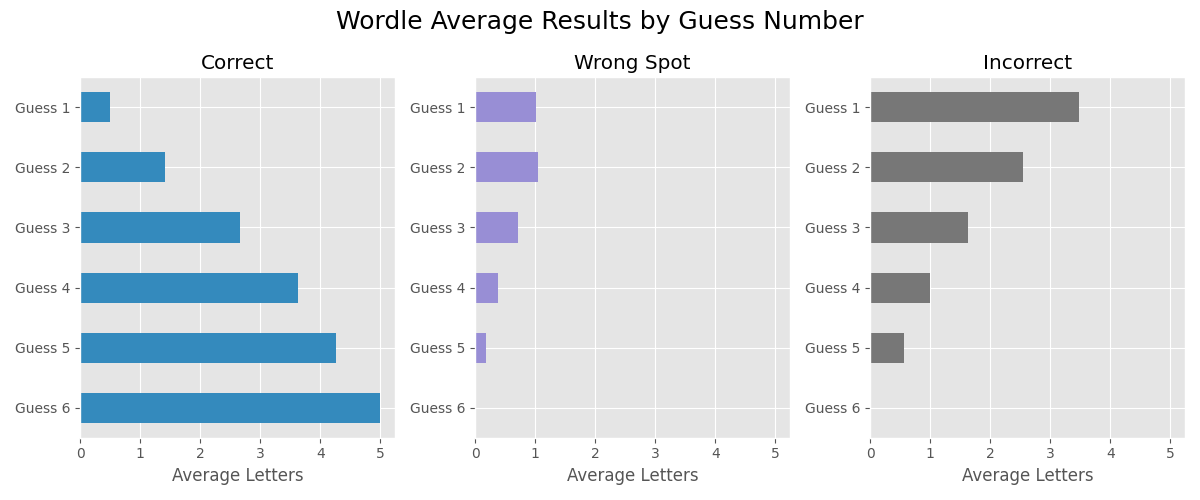

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharex=True)

for i, x in enumerate(['_correct','_wrong_spot','_incorrect']):
    col_subset = [c for c in tweets.columns if x in c]
    guess_avg = tweets[col_subset].mean()
    guess_avg.index = [f'Guess {i+1}' for i in range(6)]
    guess_avg.sort_index(ascending=False) \
        .plot(kind='barh',
              title=f'{x.strip("_").replace("_"," ").title()}',
              ax=axs[i],
              color=color_pal[i+1])
    axs[i].set_xlabel('Average Letters')
fig.suptitle('Wordle Average Results by Guess Number', fontsize=18)
plt.tight_layout()
plt.show()